In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "archivo/animals/Entrenamiento"
# validation_path = "archivo/animals/Validation"
test_path = "archivo/animals/Testing"
image_categories = os.listdir('archivo/animals/Entrenamiento')

In [3]:
def plot_images(image_categories):

 # Create a figure
 plt.figure(figsize=(12, 12))
for i, cat in enumerate(image_categories):

 # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0


 # Create Subplot and plot the images
    plt.subplot(10, 9, i+1)
    plt.imshow(img_arr)
   #  plt.title(cat, fontsize=10)  # Los nombres de las clases no quedan bien si es que utilizamos 90 clases
    plt.axis('off')

plt.show()

In [4]:
plot_images(image_categories)

<Figure size 1200x1200 with 0 Axes>

In [5]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data Training
train_image_generator = train_gen.flow_from_directory(
 train_path,
 target_size=(150, 150),
 batch_size=30,
 class_mode='categorical')

Found 4500 images belonging to 90 classes.


In [6]:
#Normalise the data (VALIDATION)

# val_gen = ImageDataGenerator(rescale = 1.0/255.0) 
# val_image_generator = train_gen.flow_from_directory(
#  validation_path,
#  target_size=(150, 150),
#  batch_size=32,
#  class_mode='categorical')

In [7]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data Testing
test_image_generator = train_gen.flow_from_directory(
 test_path,
 target_size=(150, 150),
 batch_size=10,
 class_mode='categorical')

Found 900 images belonging to 90 classes.


In [8]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'antelope', 1: 'badger', 2: 'bat', 3: 'bear', 4: 'bee', 5: 'beetle', 6: 'bison', 7: 'boar', 8: 'butterfly', 9: 'cat', 10: 'caterpillar', 11: 'chimpanzee', 12: 'cockroach', 13: 'cow', 14: 'coyote', 15: 'crab', 16: 'crow', 17: 'deer', 18: 'dog', 19: 'dolphin', 20: 'donkey', 21: 'dragonfly', 22: 'duck', 23: 'eagle', 24: 'elephant', 25: 'flamingo', 26: 'fly', 27: 'fox', 28: 'goat', 29: 'goldfish', 30: 'goose', 31: 'gorilla', 32: 'grasshopper', 33: 'hamster', 34: 'hare', 35: 'hedgehog', 36: 'hippopotamus', 37: 'hornbill', 38: 'horse', 39: 'hummingbird', 40: 'hyena', 41: 'jellyfish', 42: 'kangaroo', 43: 'koala', 44: 'ladybugs', 45: 'leopard', 46: 'lion', 47: 'lizard', 48: 'lobster', 49: 'mosquito', 50: 'moth', 51: 'mouse', 52: 'octopus', 53: 'okapi', 54: 'orangutan', 55: 'otter', 56: 'owl', 57: 'ox', 58: 'oyster', 59: 'panda', 60: 'parrot', 61: 'pelecaniformes', 62: 'penguin', 63: 'pig', 64: 'pigeon', 65: 'porcupine', 66: 'possum', 67: 'raccoon', 68: 'rat', 69: 'reindeer', 70: 'rhinocero

In [9]:

#Construir un modelo secuencial de CNN personalizado

model = Sequential() # model object

#Agregar capas
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',
input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

#Aplanar el mapa de características
model.add(Flatten())

#Agregar las fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(90, activation='softmax'))

#imprime un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=10,
                 verbose=1, 
                #  validation_data=val_image_generator,
                 steps_per_epoch = 150//30,
                #  validation_steps = 300//32,
                 callbacks=early_stopping)

Epoch 1/10
5/5 [==============================] - 3s 428ms/step - loss: 5.7791 - accuracy: 0.0067
Epoch 2/10
5/5 [==============================] - 2s 400ms/step - loss: 4.5495 - accuracy: 0.0067
Epoch 3/10
5/5 [==============================] - 2s 368ms/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 2s 373ms/step - loss: 4.5030 - accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 2s 412ms/step - loss: 4.4961 - accuracy: 0.0200
Epoch 6/10
5/5 [==============================] - 2s 397ms/step - loss: 4.4966 - accuracy: 0.0133
Epoch 7/10
5/5 [==============================] - 2s 427ms/step - loss: 4.4993 - accuracy: 0.0000e+00
Epoch 8/10
5/5 [==============================] - 2s 399ms/step - loss: 4.4975 - accuracy: 0.0000e+00
Epoch 9/10
5/5 [==============================] - 2s 391ms/step - loss: 4.4910 - accuracy: 0.0067
Epoch 10/10
5/5 [==============================] - 2s 381ms/step - loss: 4.4959 - accuracy: 0.0067


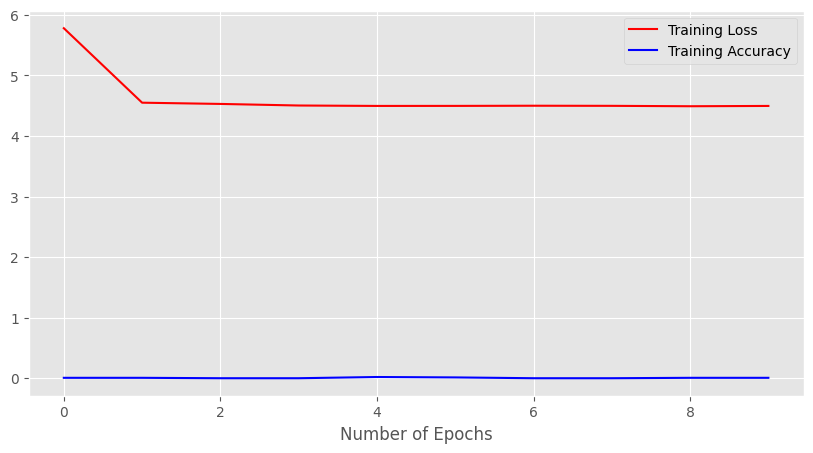

In [11]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
# plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
# plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [12]:
model.evaluate(test_image_generator)

30/30 [==============================] - 5s 163ms/step - loss: 4.4991 - accuracy: 0.0144


[4.4991068840026855, 0.014444444328546524]

1/1 [==============================] - 0s 82ms/step


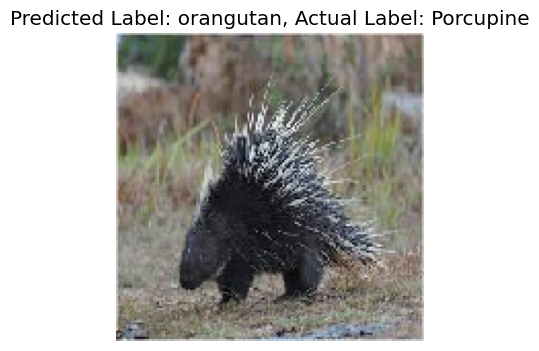

In [13]:
test_image_path = 'archivo/animals/Testing/porcupine/89e93ecb79.jpg'
def generate_predictions(test_image_path,  actual_label):
    
    #load and preprocess the image
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Make predictions
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_animal = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_animal, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Call the function
generate_predictions(test_image_path, actual_label='Porcupine') 